In [272]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

In [273]:
from os import listdir
from os.path import isfile, join
import re
from matplotlib import pyplot as plt
def isjpg(filepath):
    return re.search(".jpg$", filepath)
    
mypath = "/home/b1jeong/dsc160-midterm-group13/data/scenes/toy_story_4"

onlyfiles = [f for f in listdir(mypath) if isjpg(join(mypath, f))]
i = 0
ans={}
testEld = []
index = []

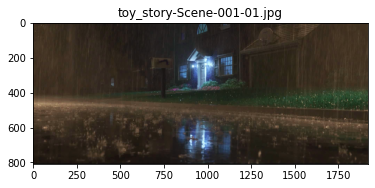

In [274]:
if i < len(onlyfiles) - 1:
    test = cv2.imread(join(mypath, onlyfiles[i]))
    test_next = cv2.imread(join(mypath, onlyfiles[i+1]))

    testEld.append(test)
    testEld.append(test_next)
    plt.imshow(test)
    title = onlyfiles[i]
    plt.title(f"{title}")
    plt.show()
    i+=1

In [275]:
len(testEld)

2

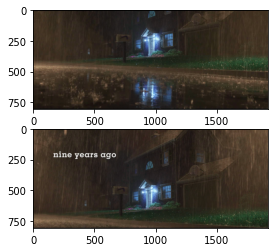

In [276]:
f, axarr = plt.subplots(2,1)
axarr[0].imshow(testEld[0])
axarr[1].imshow(testEld[1])
plt.show()

In [277]:
prev = cv2.cvtColor(testEld[0], cv2.COLOR_BGR2GRAY)
forward = cv2.cvtColor(testEld[1], cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(prev)
# Sets image saturation to maximum
mask[..., 1] = 255

# flow = cv2.calcOpticalFlowFarneback(prev, forward, pyr_scale=0.5, levels =3, winsize =15, iterations=3, poly_n =5, poly_sigma=1, flags=0)
flow = cv2.calcOpticalFlowFarneback(prev, forward, flow=None, pyr_scale=0.5,levels =1,winsize=3,iterations=15,poly_n=3,poly_sigma=5,flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# mask[..., 0] = angle * 180 / np.pi / 2
# mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
# rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
angle.shape

(808, 1920)

In [278]:
normalized = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)[0]
ans.update({f"{title} flow magnitude":np.linalg.norm(normalized)})

In [279]:
angle

array([[3.4088886 , 0.01402892, 0.01207431, ..., 2.774167  , 0.04741535,
        0.04433631],
       [3.7748423 , 6.265675  , 6.2386017 , ..., 3.482382  , 6.1348    ,
        0.07823206],
       [6.2533236 , 0.19796124, 0.15239342, ..., 2.8100145 , 0.19873895,
        6.2367396 ],
       ...,
       [3.0748181 , 3.732306  , 3.768537  , ..., 5.978175  , 5.838258  ,
        3.1022115 ],
       [3.169408  , 2.923956  , 2.4245574 , ..., 3.0603473 , 3.0870905 ,
        3.1816404 ],
       [3.1556053 , 3.1575384 , 3.1828134 , ..., 3.1741283 , 3.1648808 ,
        3.1644335 ]], dtype=float32)

In [280]:
testEld=[]

In [281]:
ans

{'toy_story-Scene-001-01.jpg flow magnitude': 0.8443021}